In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (3).json


Saving kaggle.json to kaggle (4).json


In [ ]:
# Download the Netflix dataset from Kaggle
!kaggle datasets download -d shivamb/netflix-shows

# Unzip the downloaded file
!unzip netflix-shows.zip


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 528MB/s]
Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: netflix_titles.csv      


In [ ]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()


✅ Dataset loaded successfully!
(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Clean and explore the dataset
df.columns = df.columns.str.strip().str.lower()  # make column names lowercase and tidy

# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Convert date_added to a proper datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

print("✅ Data cleaned successfully!")
print("\nMissing values after cleaning:")
print(df.isnull().sum().head())

# Basic info
print("\nDataset Information:")
df.info()


✅ Data cleaned successfully!

Missing values after cleaning:
show_id       0
type          0
title         0
director      0
cast        825
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime6

/tmp/ipython-input-2672562603.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2672562603.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

/tmp/ipython-input-3635323388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


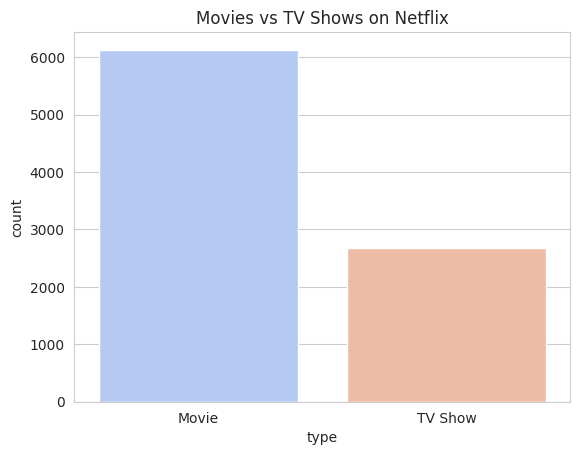

In [ ]:
# Count of Movies vs TV Shows
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


/tmp/ipython-input-637399490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


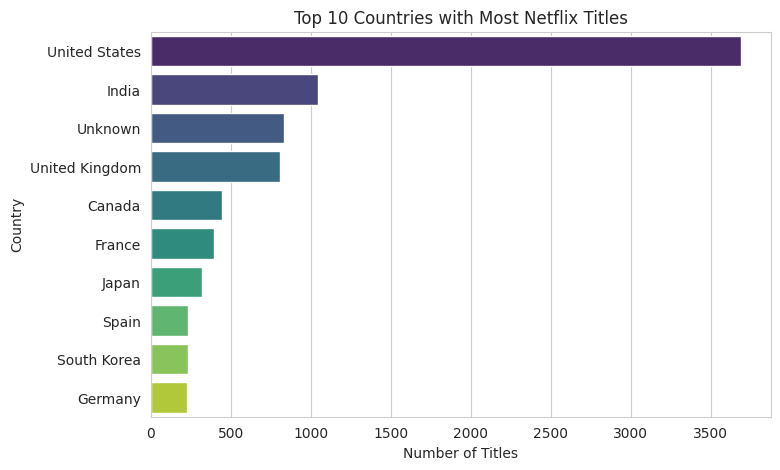

In [ ]:
# Top 10 countries with the most Netflix titles
top_countries = (
    df['country']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


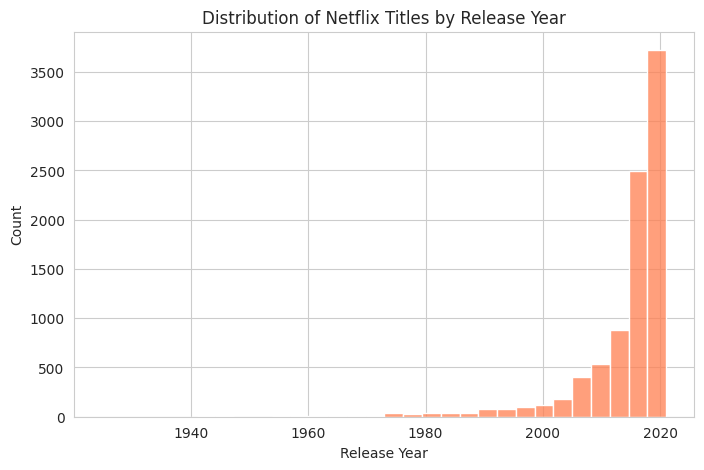

In [ ]:
# Distribution of Netflix titles by release year
plt.figure(figsize=(8,5))
sns.histplot(df['release_year'], bins=30, color='coral')
plt.title("Distribution of Netflix Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


In [ ]:
print("✅ Insights Summary:")
print("- Netflix has more movies than TV shows.")
print("- US and India produce the most Netflix content.")
print("- Most content was released between 2015–2020.")
print("- Dramas and international titles are especially popular.")


✅ Insights Summary:
- Netflix has more movies than TV shows.
- US and India produce the most Netflix content.
- Most content was released between 2015–2020.
- Dramas and international titles are especially popular.
